In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns

### Holidays:

    - NY marathon Nov,7 2021
    - Thanksgiving (parade) Nov 25, 2021
    - Christmas Dec 24 and Dec 25
    - New Years Dec 31 and Jan 1
    - Independence Day July 4

In [2]:
def reformat_df(df):
    df.columns=df.columns.str.lower().str.replace(' ','')
    df.drop(columns=['c/a','unit', 'scp', 'linename', 'division', 'time', 'desc'],axis=1,inplace=True)
    df = df.groupby("station").agg("sum").sort_values(by="entries",ascending=False).head(20)
    
    return df

In [11]:
def plot_df(stations):
    rows = 3
    cols = 3
    
    f, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))
    plt.subplots_adjust(wspace = 0.9)
    
    # plot counter
    count=0
    for r in range(rows):
        for c in range(cols):
            if count < len(stations):
                sns.barplot(x=stations[count]['df']['entries'], y=stations[count]['df'].index, data=stations[count]['df'],label='Entries', color='r',ax=axs[r,c])
                sns.barplot(x=stations[count]['df']['exits'], y=stations[count]['df'].index, data=stations[count]['df'],label='Exits', color='b',ax=axs[r,c])
                axs[r,c].set_title('Traffic flow for ' + stations[count]['name'])
                axs[r,c].legend()
                count+=1
   # f.delaxes(axs[1][2])
    plt.show()

In [72]:
# downloading initial file.
# df_marathon = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211113.txt',sep = ',')
# df_thanksgiving = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211127.txt', sep = ',')
# df_christmas_eve = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211225.txt',sep = ',')
# df_christmas_day = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211225.txt',sep = ',')
# df_newYear_eve = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220101.txt',sep = ',')
# df_newYear_day = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220101.txt',sep = ',')
# df_fourthOfJuly = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220709.txt',sep = ',') 
df = pd.read_csv('../data/df_cleaned.csv')

In [75]:
df_marathon = df[df['unit'] == 'R248']
# df_thanksgiving[df_thanksgiving['DATE'] == '11/25/2021']
# df_christmas_eve[df_christmas_eve['DATE'] == '12/24/2021']
# df_christmas_day[df_christmas_day['DATE'] == '12/25/2021']
# df_newYear_eve[df_newYear_eve['DATE'] == '12/31/2021']
# df_newYear_day[df_newYear_day['DATE'] == '01/01/2022']
# df_fourthOfJuly[df_fourthOfJuly['DATE'] == '07/04/2022']
df_marathon

,datetime,stat_id,unit,scp,station,linename,entries_abs,exits_abs
0,2022-10-01 00:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,92,474
1,2022-10-01 04:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,19,199
2,2022-10-01 08:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,10,167
3,2022-10-01 12:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,55,380
4,2022-10-01 16:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,91,580
...,...,...,...,...,...,...,...,...
999,2022-10-07 04:00:00,1 AV 02-05-01 H007A,R248,02-05-01,1 AV,L,0,0
1000,2022-10-07 08:00:00,1 AV 02-05-01 H007A,R248,02-05-01,1 AV,L,0,0
1001,2022-10-07 12:00:00,1 AV 02-05-01 H007A,R248,02-05-01,1 AV,L,0,0
1002,2022-10-07 16:00:00,1 AV 02-05-01 H007A,R248,02-05-01,1 AV,L,0,1


In [15]:
stations = [{'df':df_marathon, 'name':'Marathon'}, 
            {'df':df_thanksgiving, 'name':'Thanksgiving'}, 
            {'df':df_christmas_eve, 'name':'Christmas Eve'},
            {'df':df_christmas_day, 'name':'Christmas Day'},
            {'df':df_newYear_eve, 'name':'New Years Eve'}, 
            {'df':df_newYear_day, 'name':'New Years Day'}, 
            {'df':df_fourthOfJuly, 'name':'Fourth of July'}]

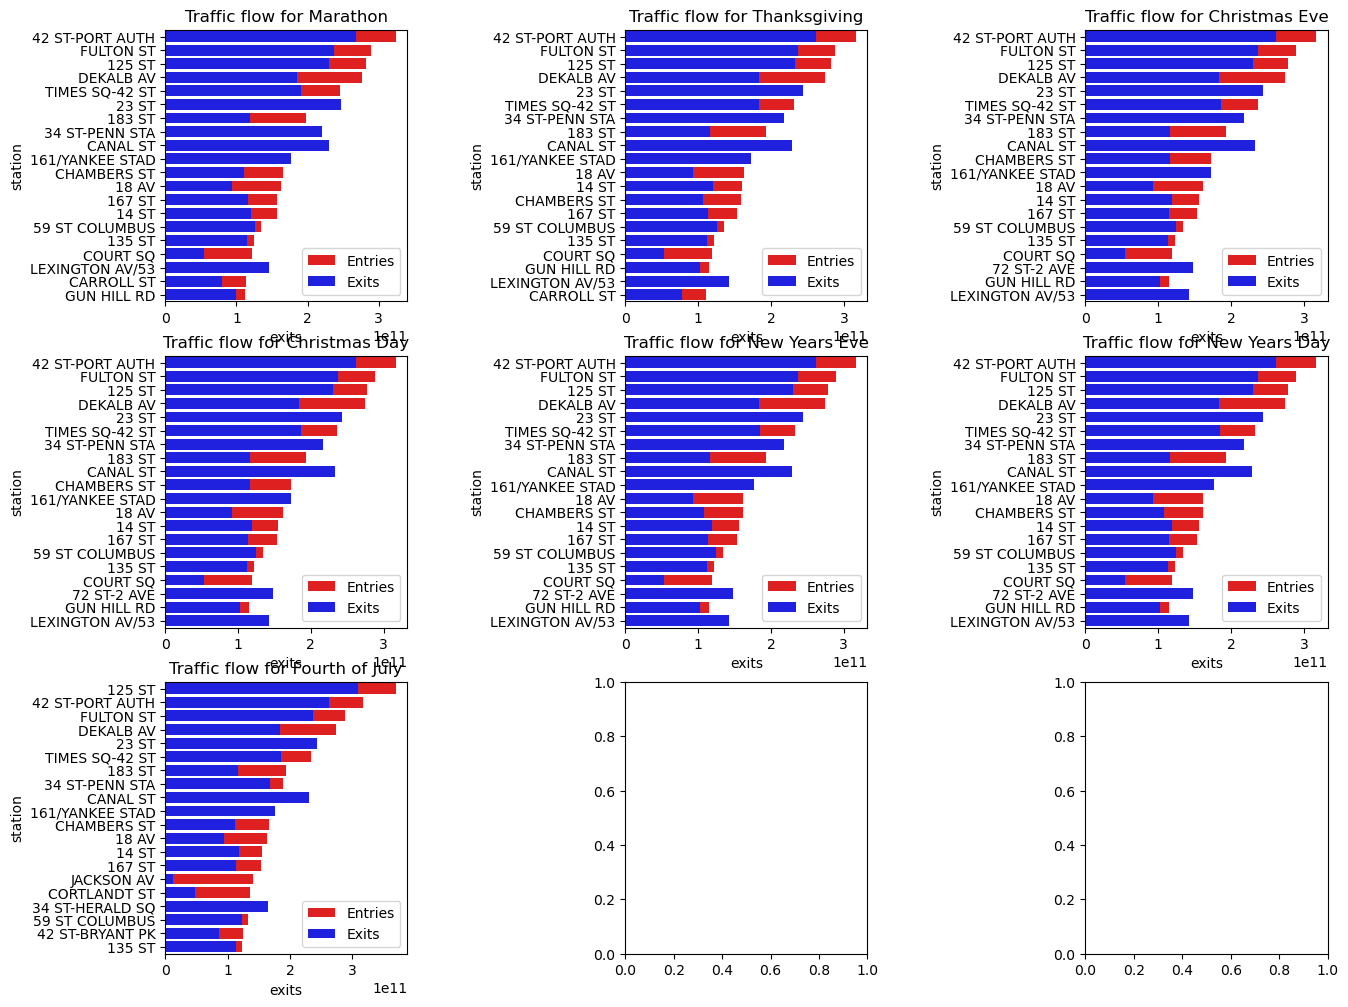

In [16]:
for station in stations:
    station['df'] = reformat_df(station['df'])

plot_df(stations)

---

Let's plot for the most popular stations 42 st:

In [28]:
df_marathon.head()

,station,date,entries,exits
0,59 ST,11/06/2021,7660549,2627986
1,59 ST,11/06/2021,7660560,2627991
2,59 ST,11/06/2021,7660565,2628002
3,59 ST,11/06/2021,7660608,2628090
4,59 ST,11/06/2021,7660671,2628151


In [29]:
df_thanksgiving.head()

,station,date,entries,exits
0,59 ST,11/20/2021,7664844,2633617
1,59 ST,11/20/2021,7664849,2633627
2,59 ST,11/20/2021,7664874,2633722
3,59 ST,11/20/2021,7664921,2633814
4,59 ST,11/20/2021,7665006,2633867


In [41]:
big_df = pd.concat([df_marathon, df_thanksgiving], axis = 0, join = 'inner')

In [43]:
big_df.shape

(422362, 4)

In [46]:
big_df['station'].value_counts()

34 ST-PENN STA     8796
FULTON ST          8082
GRD CNTRL-42 ST    8031
23 ST              6169
86 ST              5507
                   ... 
BURKE AV            251
SHEPHERD AV         249
ALABAMA AV          249
SUTTER AV           168
CLEVELAND ST        168
Name: station, Length: 378, dtype: int64

In [57]:
big_df = big_df[big_df['station']=="FULTON ST"]
big_df.head()

,station,date,entries,exits
12710,FULTON ST,11/06/2021,472339,151162
12711,FULTON ST,11/06/2021,472342,151167
12712,FULTON ST,11/06/2021,472374,151190
12713,FULTON ST,11/06/2021,472434,151242
12714,FULTON ST,11/06/2021,472505,151299


<AxesSubplot:xlabel='date'>

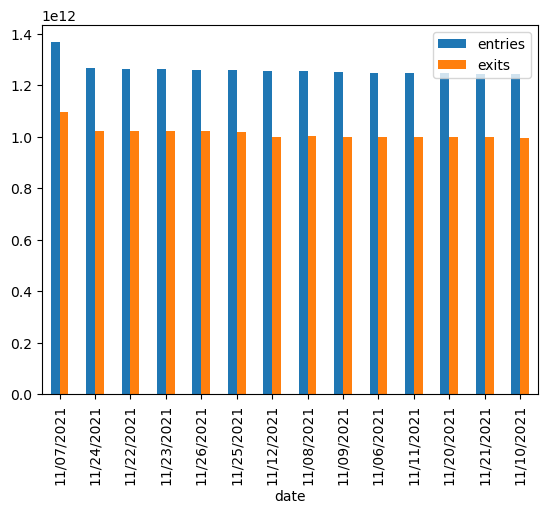

In [52]:
df.plot(kind = 'bar')

In [71]:
entries = big_df.groupby("date").get_group('11/07/2021')['entries'].sum()
entries

41240937992

In [69]:
exits = big_df.groupby("date").get_group("11/07/2021")['exits'].sum()
exits

33811949335